# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query URL
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create lists and loop through each city - append? 
# need to turn into .json

name = []
city_id = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []
counter = 0

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        print(f"{city} city number {counter} of {len(cities)} has been located.")
        counter += 1

    except (KeyError, IndexError):
        print(f"Missing data for city number {counter} of {len(cities)}.")
        counter += 1
    
    time.sleep(1)

busselton city number 0 of 612 has been located.
Missing data for city number 1 of 612.
Missing data for city number 2 of 612.
provideniya city number 3 of 612 has been located.
puerto ayora city number 4 of 612 has been located.
rikitea city number 5 of 612 has been located.
camacha city number 6 of 612 has been located.
punta arenas city number 7 of 612 has been located.
aklavik city number 8 of 612 has been located.
canala city number 9 of 612 has been located.
mataura city number 10 of 612 has been located.
vaini city number 11 of 612 has been located.
ponta do sol city number 12 of 612 has been located.
Missing data for city number 13 of 612.
ushuaia city number 14 of 612 has been located.
kristiinankaupunki city number 15 of 612 has been located.
east grinstead city number 16 of 612 has been located.
swadlincote city number 17 of 612 has been located.
las choapas city number 18 of 612 has been located.
yellowknife city number 19 of 612 has been located.
new norfolk city number 20

In [7]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame({"City":name, "Country":country, "Latitude":lat, "Longitude":lon, "Max Temperature (F)":temperature, "Humidity (%)":humidity, "Cloud Cover (%)":cloudiness, "Wind Speed (mph)":windspeed, "Date":date})
city_data_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Busselton,AU,-33.6500,115.3333,66.00,62,69,5.01,1613010793
1,Provideniya,RU,64.3833,-173.3000,-9.40,64,0,20.13,1613011297
2,Puerto Ayora,EC,-0.7393,-90.3518,75.00,99,76,5.41,1613011101
3,Rikitea,PF,-23.1203,-134.9692,78.48,78,3,13.22,1613011107
4,Camacha,PT,33.0833,-16.3333,62.60,94,40,3.44,1613011329


In [8]:
# Inspect the data and remove the cities where the humidity > 100%.
clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Busselton,AU,-33.6500,115.3333,66.00,62,69,5.01,1613010793
1,Provideniya,RU,64.3833,-173.3000,-9.40,64,0,20.13,1613011297
2,Puerto Ayora,EC,-0.7393,-90.3518,75.00,99,76,5.41,1613011101
3,Rikitea,PF,-23.1203,-134.9692,78.48,78,3,13.22,1613011107
4,Camacha,PT,33.0833,-16.3333,62.60,94,40,3.44,1613011329
...,...,...,...,...,...,...,...,...,...
550,Flin Flon,CA,54.7682,-101.8650,-29.04,84,90,5.21,1613012024
551,Ust-Kuyga,RU,70.0167,135.6000,-14.40,83,0,7.81,1613012025
552,Chihuahua,MX,28.5000,-106.0000,68.00,14,20,9.22,1613011864
553,Ahipara,NZ,-35.1667,173.1667,69.42,65,76,11.23,1613011995


In [10]:
# Export the cleaned data dataframe to a csv for later use.
clean_city_data_df.to_csv("city_data.csv", header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Inspect data and remove the cities where the humidity > 100%

clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Busselton,AU,-33.6500,115.3333,66.00,62,69,5.01,1613010793
1,Provideniya,RU,64.3833,-173.3000,-9.40,64,0,20.13,1613011297
2,Puerto Ayora,EC,-0.7393,-90.3518,75.00,99,76,5.41,1613011101
3,Rikitea,PF,-23.1203,-134.9692,78.48,78,3,13.22,1613011107
4,Camacha,PT,33.0833,-16.3333,62.60,94,40,3.44,1613011329
...,...,...,...,...,...,...,...,...,...
550,Flin Flon,CA,54.7682,-101.8650,-29.04,84,90,5.21,1613012024
551,Ust-Kuyga,RU,70.0167,135.6000,-14.40,83,0,7.81,1613012025
552,Chihuahua,MX,28.5000,-106.0000,68.00,14,20,9.22,1613011864
553,Ahipara,NZ,-35.1667,173.1667,69.42,65,76,11.23,1613011995


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

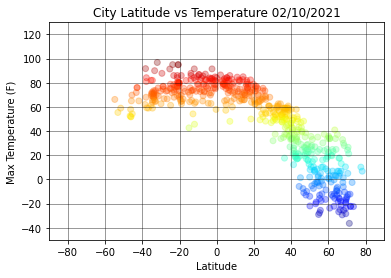

In [19]:
#create latitude vs. temperature plot chart 
plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.5)
plt.xlim(-90,90)
plt.ylim(-50, 130)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.3, c = clean_city_data_df["Max Temperature (F)"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("LatTempCities.png")

plt.show()

## Latitude vs. Humidity Plot

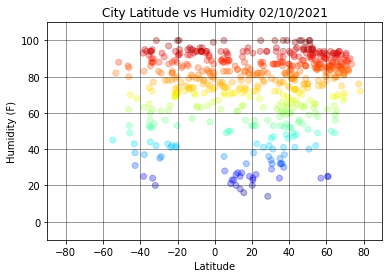

In [20]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.5)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.3, c = clean_city_data_df["Humidity (%)"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("LatHumidityCities.png")

plt.show()

## Latitude vs. Cloudiness Plot

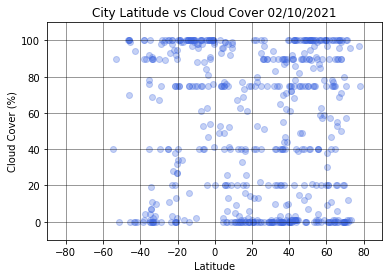

In [21]:
#lat vs cloudy plot 
plt.title(f'City Latitude vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.5)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
plt.savefig("LatCloudCities.png")

plt.show()

## Latitude vs. Wind Speed Plot

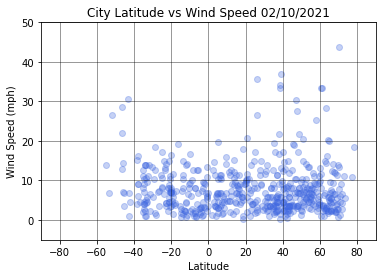

In [22]:
#lat vs wind speed? plot 
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.5)
plt.xlim(-90,90)
plt.ylim(-5, 50)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
plt.savefig("LatWindSpeedCities.png")

plt.show()

## Linear Regression

In [27]:
#create df for northern cities first and then southern cities? 
northern_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0]
northern_cities.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
1,Provideniya,RU,64.3833,-173.3000,-9.40,64,0,20.13,1613011297
4,Camacha,PT,33.0833,-16.3333,62.60,94,40,3.44,1613011329
6,Aklavik,CA,68.2191,-135.0107,-25.60,75,0,2.30,1613011331
10,Ponta do Sol,PT,32.6667,-17.1000,60.01,78,83,1.01,1613011336
12,Kristinestad,FI,62.2743,21.3760,6.89,94,11,2.98,1613011339


In [28]:
#south 
southern_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0]
southern_cities.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Busselton,AU,-33.6500,115.3333,66.00,62,69,5.01,1613010793
2,Puerto Ayora,EC,-0.7393,-90.3518,75.00,99,76,5.41,1613011101
3,Rikitea,PF,-23.1203,-134.9692,78.48,78,3,13.22,1613011107
5,Punta Arenas,CL,-53.1500,-70.9167,55.40,82,90,6.91,1613011330
7,Canala,NC,-21.5333,165.9500,77.00,73,75,8.05,1613011332


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

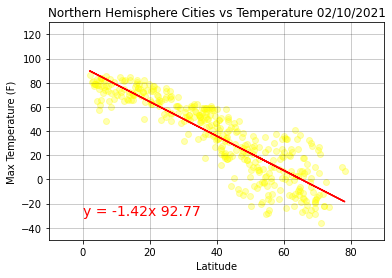

In [38]:
# Set the x and y limits

x_values = northern_cities["Latitude"]
y_values = northern_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (0,-30), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="yellow", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("NorthernTempLat.png")

plt.show()





####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

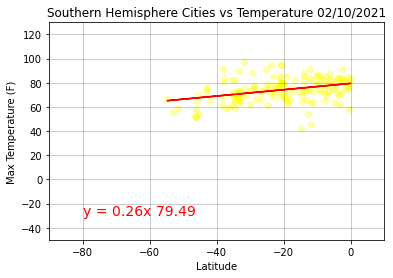

In [37]:
#same as above 
x_values = southern_cities["Latitude"]
y_values = southern_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (-80,-30), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="yellow", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("SouthernTempLat.png")

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

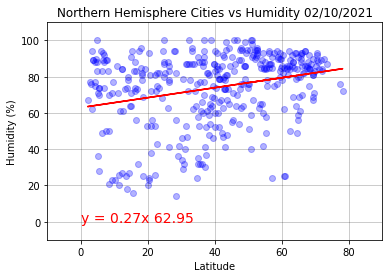

In [36]:
x_values = northern_cities["Latitude"]
y_values = northern_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (0,0), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="blue", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("NorthernCitiesHumidity.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

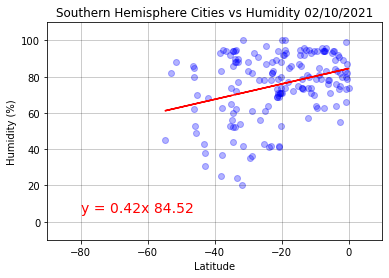

In [39]:
x_values = southern_cities["Latitude"]
y_values = southern_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="blue", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("SouthernCitiesHumidity.png")

plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

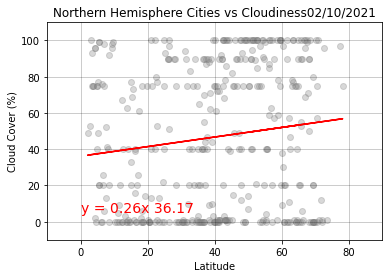

In [43]:
x_values = northern_cities["Latitude"]
y_values = northern_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Cloudiness{time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (0,5), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="grey", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("NorthernCloudiness.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

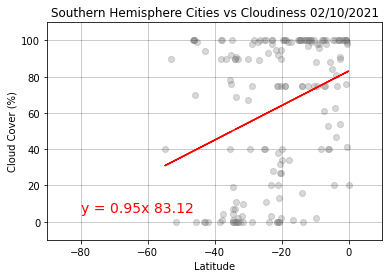

In [42]:
x_values = southern_cities["Latitude"]
y_values = southern_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="grey", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("SourthernCloudiness.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

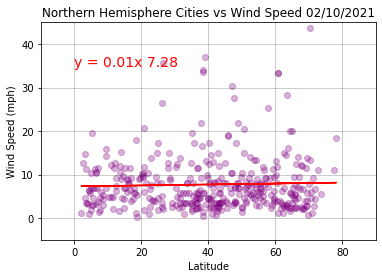

In [44]:
x_values = northern_cities["Latitude"]
y_values = northern_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (0,35), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="purple", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("NorthernWind.png")

plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

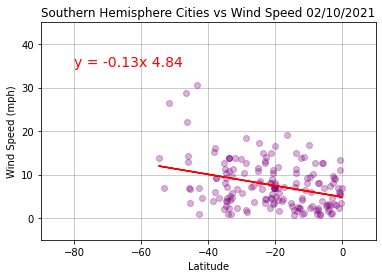

In [45]:
x_values = southern_cities["Latitude"]
y_values = southern_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="black", alpha = 0.25)
plt.annotate(line_eq, (-80,35), fontsize = 14, color = "red")

plt.scatter(x_values, y_values, color="purple", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("SouthernWind.png")
plt.show()